In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fast-text-word-embeddings/wiki-news-300d-1M.vec
/kaggle/input/glove6b100dtxt/glove.6B.100d.txt
/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv
/kaggle/input/glove6b/glove.6B.200d.txt
/kaggle/input/glove6b/glove.6B.50d.txt
/kaggle/input/glove6b/glove.6B.300d.txt
/kaggle/input/glove6b/glove.6B.100d.txt
/kaggle/input/original-embeddings/GoogleNews-vectors-negative300(first500000).txt
/kaggle/input/original-embeddings/glove.6B.300d.txt
/kaggle/input/fasttext/wiki.simple.vec


**Importing packages**

In [2]:
import re 
import nltk 
from nltk.corpus import stopwords 
from numpy import array 
from keras.preprocessing.text import one_hot 
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model 
from keras.layers.core import Activation, Dropout, Dense 
from keras.layers import Flatten
from keras.layers import Conv1D 
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import LSTM,GRU
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split 
from keras.preprocessing.text import Tokenizer
from gensim.models import KeyedVectors


**Reading the data**

In [3]:
train=pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
train.shape

(50000, 2)

In [4]:
train.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
train.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


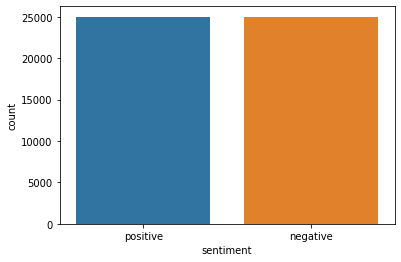

In [6]:
import seaborn as sns
ax=sns.countplot(x="sentiment", data=train)


In [7]:
train['review'].iloc[3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [8]:
def remove_tags(text):
 return TAG_RE.sub('', text)
def preprocess_text(sen):
# Removing html tags
 sentence = remove_tags(sen)
# Remove punctuations and numbers
 sentence = re.sub('[^a-zA-Z]', ' ', sentence)
# Single character removal
 sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
# Removing multiple spaces
 sentence = re.sub(r'\s+', ' ', sentence)
 return sentence

TAG_RE = re.compile(r'<[^>]+>')


In [9]:
X = []
sentences = list(train['review'])
for sen in sentences:
 X.append(preprocess_text(sen))

In [10]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [11]:
y = train['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=42)

In [13]:
tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [14]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1 
maxlen = 100 
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen) 
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [15]:
X_train

array([[   4,    1,  296, ...,  198,  345, 3812],
       [   1,  412,  100, ...,   82,   99,    6],
       [ 128, 1307,  108, ...,    0,    0,    0],
       ...,
       [ 778,    8,   24, ...,    0,    0,    0],
       [   8,  347,   10, ...,    0,    0,    0],
       [ 274,  100,  121, ...,   67,   69, 1946]], dtype=int32)

In [16]:
from numpy import array 
from numpy import asarray 
from numpy import zeros 
def embeddings(path):
    embeddings_dictionary = dict() 
    embeddings_file = open(path) 
    for line in embeddings_file:
        records = line.split()
        word = records[0] 
        vector_dimensions = asarray(records[1:],dtype='float32') 
        embeddings_dictionary[word] = vector_dimensions
    embeddings_file.close()
    return embeddings_dictionary
embeddings_dictionary=embeddings("../input/glove6b100dtxt/glove.6B.100d.txt")

In [17]:
embedding_matrix = zeros((vocab_size, 100)) 
for word, index in tokenizer.word_index.items(): 
    embedding_vector = embeddings_dictionary.get(word) 
    if embedding_vector is not None: 
        embedding_matrix[index] = embedding_vector


**A-Simple model**

In [18]:
def simple_model(X_train,y_train):
    model=Sequential()
    model.add(Embedding(vocab_size,100,weights=[embedding_matrix],input_length=maxlen,trainable=False))
    model.add(Flatten())
    model.add(Dense(1,activation='sigmoid'))
    model.compile("adam",loss='binary_crossentropy',metrics=["acc"])
    history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
    return model,history


In [19]:
model,history=simple_model(X_train,y_train)

2022-04-28 15:26:38.019738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-28 15:26:38.125893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-28 15:26:38.127321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-28 15:26:38.128801: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/6
250/250 [==============================] - 2s 3ms/step - loss: 0.6059 - acc: 0.6719 - val_loss: 0.5568 - val_acc: 0.7120
Epoch 2/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4955 - acc: 0.7634 - val_loss: 0.5200 - val_acc: 0.7454
Epoch 3/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4593 - acc: 0.7857 - val_loss: 0.5370 - val_acc: 0.7321
Epoch 4/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4380 - acc: 0.7966 - val_loss: 0.5221 - val_acc: 0.7405
Epoch 5/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4299 - acc: 0.8025 - val_loss: 0.5315 - val_acc: 0.7429
Epoch 6/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4038 - acc: 0.8186 - val_loss: 0.5321 - val_acc: 0.7435


In [20]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.5356 - acc: 0.7419
Test Score: 0.5355772972106934
Test Accuracy: 0.7419000267982483


In [21]:
import matplotlib.pyplot as plt
def plotting(history):
    plt.plot(history.history['acc']) 
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left') 
    plt.show() 
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss') 
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left') 
    plt.show()


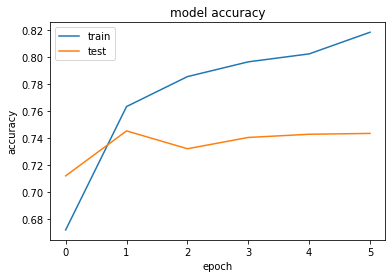

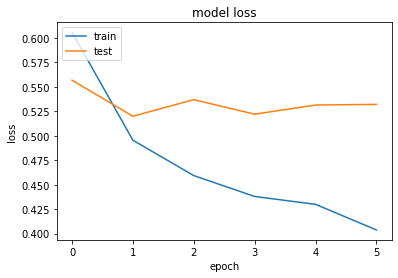

In [22]:
plotting(history)

**B-CNN model**

In [23]:
def model_cnn(X_train,y_train):
    model_cnn=Sequential()

    model_cnn.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen))
    model_cnn.add(Conv1D(128,5,activation='relu'))
    model_cnn.add(GlobalMaxPooling1D())
    model_cnn.add(Dense(1,activation='sigmoid'))
    model_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
    history=model_cnn.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
    return model_cnn,history

        

In [24]:
model_cnn,history=model_cnn(X_train,y_train)

Epoch 1/6


2022-04-28 15:26:50.943296: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


250/250 [==============================] - 8s 9ms/step - loss: 0.4669 - acc: 0.7743 - val_loss: 0.3574 - val_acc: 0.8391
Epoch 2/6
250/250 [==============================] - 2s 7ms/step - loss: 0.3142 - acc: 0.8663 - val_loss: 0.3234 - val_acc: 0.8568
Epoch 3/6
250/250 [==============================] - 2s 9ms/step - loss: 0.2426 - acc: 0.9045 - val_loss: 0.3139 - val_acc: 0.8644
Epoch 4/6
250/250 [==============================] - 2s 7ms/step - loss: 0.1942 - acc: 0.9283 - val_loss: 0.3324 - val_acc: 0.8571
Epoch 5/6
250/250 [==============================] - 2s 7ms/step - loss: 0.1464 - acc: 0.9533 - val_loss: 0.3348 - val_acc: 0.8627
Epoch 6/6
250/250 [==============================] - 2s 7ms/step - loss: 0.1044 - acc: 0.9740 - val_loss: 0.3378 - val_acc: 0.8652


In [25]:
score = model_cnn.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3136 - acc: 0.8718
Test Score: 0.3135591447353363
Test Accuracy: 0.8718000054359436


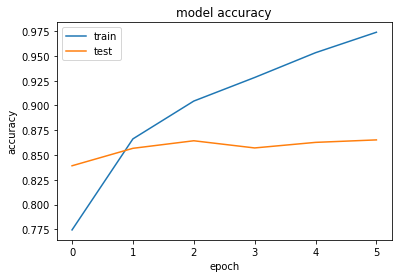

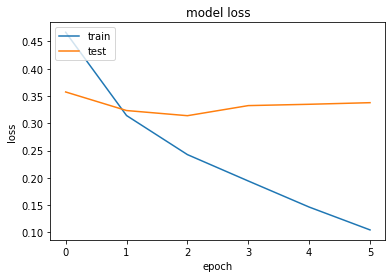

In [26]:
plotting(history)

**3-RNN model**

In [27]:
def model_RNN(X_train,y_train,l,embedding_matrix):
    model_rnn=Sequential()
    model_rnn.add(Embedding(vocab_size, l, weights=[embedding_matrix],input_length=maxlen))
    model_rnn.add(LSTM(128))
    model_rnn.add(Dense(1,activation='sigmoid'))
    model_rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
    history=model_rnn.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
    return model_rnn,history

In [28]:
model_rnn,history=model_RNN(X_train,y_train,100,embedding_matrix)

Epoch 1/6
250/250 [==============================] - 6s 14ms/step - loss: 0.4878 - acc: 0.7607 - val_loss: 0.3706 - val_acc: 0.8396
Epoch 2/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3362 - acc: 0.8591 - val_loss: 0.3294 - val_acc: 0.8579
Epoch 3/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2912 - acc: 0.8792 - val_loss: 0.3224 - val_acc: 0.8630
Epoch 4/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2618 - acc: 0.8941 - val_loss: 0.3212 - val_acc: 0.8654
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2328 - acc: 0.9086 - val_loss: 0.3272 - val_acc: 0.8674
Epoch 6/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2092 - acc: 0.9193 - val_loss: 0.3332 - val_acc: 0.8637


In [29]:
score = model_rnn.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3233 - acc: 0.8640
Test Score: 0.323274165391922
Test Accuracy: 0.8640000224113464


**Polarité**

In [30]:
predict_x=model_rnn.predict(X_test[7:8]) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[0]


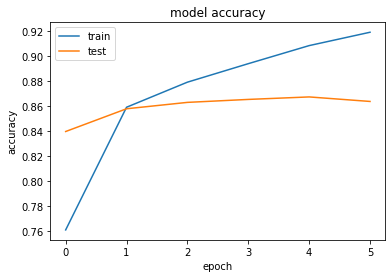

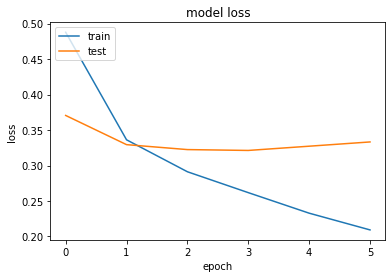

In [31]:
plotting(history)

**Classement des 3 models**
1. rnn
2. cnn
3. simple model

**RNN with GRU**

In [32]:
def model_GRU(X_train,y_train,l,embedding_matrix):
    model_rnn=Sequential()
    model_rnn.add(Embedding(vocab_size, l, weights=[embedding_matrix],input_length=maxlen))
    model_rnn.add(GRU(128))
    model_rnn.add(Dense(1,activation='sigmoid'))
    model_rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
    history=model_rnn.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
    return model_rnn,history

In [33]:
m,h=model_GRU(X_train,y_train,100,embedding_matrix)

Epoch 1/6
250/250 [==============================] - 5s 13ms/step - loss: 0.4999 - acc: 0.7335 - val_loss: 0.3323 - val_acc: 0.8540
Epoch 2/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3054 - acc: 0.8697 - val_loss: 0.3089 - val_acc: 0.8661
Epoch 3/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2581 - acc: 0.8945 - val_loss: 0.3092 - val_acc: 0.8691
Epoch 4/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2239 - acc: 0.9113 - val_loss: 0.3268 - val_acc: 0.8666
Epoch 5/6
250/250 [==============================] - 3s 12ms/step - loss: 0.1934 - acc: 0.9261 - val_loss: 0.3435 - val_acc: 0.8606
Epoch 6/6
250/250 [==============================] - 3s 12ms/step - loss: 0.1583 - acc: 0.9415 - val_loss: 0.3480 - val_acc: 0.8612


In [34]:
score = m.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.3327 - acc: 0.8649
Test Score: 0.3327268958091736
Test Accuracy: 0.8648999929428101


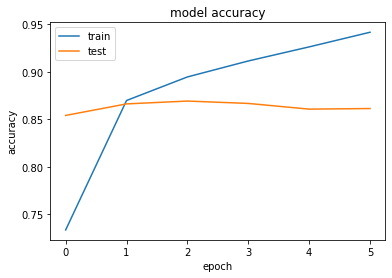

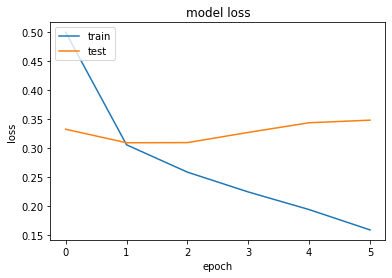

In [35]:
plotting(h)

**RNN+CNN**



In [36]:
def model_RNNCNN(X_train,y_train,l,embedding_matrix):
    modelx = Sequential()
    modelx.add((Embedding(vocab_size,l, weights=[embedding_matrix],input_length=maxlen)))
    modelx.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    modelx.add(MaxPooling1D(pool_size=2))
    modelx.add(LSTM(128))
    modelx.add(Dense(1, activation='sigmoid'))
    modelx.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=modelx.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
    return modelx,history

In [37]:
x,h=model_RNNCNN(X_train,y_train,100,embedding_matrix)

Epoch 1/6
250/250 [==============================] - 5s 13ms/step - loss: 0.4947 - accuracy: 0.7480 - val_loss: 0.3575 - val_accuracy: 0.8422
Epoch 2/6
250/250 [==============================] - 3s 11ms/step - loss: 0.3202 - accuracy: 0.8649 - val_loss: 0.3123 - val_accuracy: 0.8658
Epoch 3/6
250/250 [==============================] - 3s 11ms/step - loss: 0.2705 - accuracy: 0.8882 - val_loss: 0.3142 - val_accuracy: 0.8680
Epoch 4/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2226 - accuracy: 0.9126 - val_loss: 0.3323 - val_accuracy: 0.8626
Epoch 5/6
250/250 [==============================] - 3s 11ms/step - loss: 0.1877 - accuracy: 0.9280 - val_loss: 0.3837 - val_accuracy: 0.8462
Epoch 6/6
250/250 [==============================] - 3s 11ms/step - loss: 0.1530 - accuracy: 0.9427 - val_loss: 0.3881 - val_accuracy: 0.8456


In [38]:
score = x.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3699 - accuracy: 0.8473
Test Score: 0.3699040114879608
Test Accuracy: 0.8472999930381775


**Word2Vec**

In [39]:
word2vec=embeddings("../input/original-embeddings/GoogleNews-vectors-negative300(first500000).txt")

In [40]:
embedding_matrix1 = zeros((vocab_size, 300)) 
for word, index in tokenizer.word_index.items(): 
    embedding_vector = word2vec.get(word) 
    if embedding_vector is not None: 
        embedding_matrix1[index] = embedding_vector

In [41]:
embedding_matrix1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08007812,  0.10498047,  0.04980469, ...,  0.00366211,
         0.04760742, -0.06884766],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
x1,his=model_RNNCNN(X_train,y_train,300,embedding_matrix1)

Epoch 1/6
250/250 [==============================] - 7s 20ms/step - loss: 0.3999 - accuracy: 0.8092 - val_loss: 0.3286 - val_accuracy: 0.8675
Epoch 2/6
250/250 [==============================] - 5s 18ms/step - loss: 0.2761 - accuracy: 0.8884 - val_loss: 0.3177 - val_accuracy: 0.8706
Epoch 3/6
250/250 [==============================] - 5s 18ms/step - loss: 0.2176 - accuracy: 0.9148 - val_loss: 0.3593 - val_accuracy: 0.8645
Epoch 4/6
250/250 [==============================] - 5s 18ms/step - loss: 0.1533 - accuracy: 0.9440 - val_loss: 0.3676 - val_accuracy: 0.8659
Epoch 5/6
250/250 [==============================] - 4s 18ms/step - loss: 0.0838 - accuracy: 0.9730 - val_loss: 0.4544 - val_accuracy: 0.8590
Epoch 6/6
250/250 [==============================] - 4s 18ms/step - loss: 0.0438 - accuracy: 0.9877 - val_loss: 0.5799 - val_accuracy: 0.8549


In [43]:
score = x1.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.5599 - accuracy: 0.8578
Test Score: 0.5598547458648682
Test Accuracy: 0.8578000068664551


In [44]:
x2,his=model_RNN(X_train,y_train,300,embedding_matrix1)

Epoch 1/6
250/250 [==============================] - 7s 21ms/step - loss: 0.4130 - acc: 0.8104 - val_loss: 0.3302 - val_acc: 0.8586
Epoch 2/6
250/250 [==============================] - 5s 19ms/step - loss: 0.3023 - acc: 0.8739 - val_loss: 0.3421 - val_acc: 0.8576
Epoch 3/6
250/250 [==============================] - 5s 19ms/step - loss: 0.2638 - acc: 0.8928 - val_loss: 0.3365 - val_acc: 0.8610
Epoch 4/6
250/250 [==============================] - 5s 19ms/step - loss: 0.2205 - acc: 0.9112 - val_loss: 0.3605 - val_acc: 0.8560
Epoch 5/6
250/250 [==============================] - 5s 19ms/step - loss: 0.1846 - acc: 0.9275 - val_loss: 0.3704 - val_acc: 0.8518
Epoch 6/6
250/250 [==============================] - 5s 19ms/step - loss: 0.1547 - acc: 0.9409 - val_loss: 0.4746 - val_acc: 0.8489


In [45]:
score = x2.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.4563 - acc: 0.8548
Test Score: 0.4563477635383606
Test Accuracy: 0.8547999858856201


In [46]:
x3,his=model_GRU(X_train,y_train,300,embedding_matrix1)

Epoch 1/6
250/250 [==============================] - 7s 20ms/step - loss: 0.4312 - acc: 0.7888 - val_loss: 0.3353 - val_acc: 0.8574
Epoch 2/6
250/250 [==============================] - 4s 17ms/step - loss: 0.2847 - acc: 0.8831 - val_loss: 0.3153 - val_acc: 0.8675
Epoch 3/6
250/250 [==============================] - 5s 18ms/step - loss: 0.2355 - acc: 0.9068 - val_loss: 0.3239 - val_acc: 0.8625
Epoch 4/6
250/250 [==============================] - 4s 18ms/step - loss: 0.1942 - acc: 0.9260 - val_loss: 0.3505 - val_acc: 0.8591
Epoch 5/6
250/250 [==============================] - 4s 18ms/step - loss: 0.1579 - acc: 0.9436 - val_loss: 0.4035 - val_acc: 0.8534
Epoch 6/6
250/250 [==============================] - 4s 18ms/step - loss: 0.1187 - acc: 0.9594 - val_loss: 0.4764 - val_acc: 0.8524


In [47]:
score = x3.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4434 - acc: 0.8628
Test Score: 0.4433949291706085
Test Accuracy: 0.8628000020980835


**Fasttext**

In [48]:
#FASTEXT_Embedding = KeyedVectors.load_word2vec_format('../input/fast-text-word-embeddings/wiki-news-300d-1M.vec')

In [49]:
from tqdm import tqdm

import os, re, csv, math, codecs

In [50]:
embeddings_index = {}
f = codecs.open('../input/fasttext/wiki.simple.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

111052it [00:17, 6258.55it/s]

found 111052 word vectors


In [51]:
embedding_matrix2 = zeros((vocab_size, 100)) 
for word, index in tokenizer.word_index.items(): 
    embeddings_index = embeddings_dictionary.get(word) 
    if embeddings_index is not None: 
        embedding_matrix2[index] = embeddings_index


In [52]:
embedding_matrix2

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37771001,  0.22946   , -0.30311   , ..., -0.33610001,
         0.02637   , -0.72302002],
       [ 0.99882001,  0.044     ,  0.58508003, ..., -0.54869002,
         0.15141   ,  1.36880004]])

In [53]:
x11,his=model_RNNCNN(X_train,y_train,100,embedding_matrix2)

Epoch 1/6
250/250 [==============================] - 5s 14ms/step - loss: 0.5090 - accuracy: 0.7354 - val_loss: 0.3473 - val_accuracy: 0.8528
Epoch 2/6
250/250 [==============================] - 3s 11ms/step - loss: 0.3172 - accuracy: 0.8635 - val_loss: 0.3112 - val_accuracy: 0.8679
Epoch 3/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2621 - accuracy: 0.8939 - val_loss: 0.3111 - val_accuracy: 0.8674
Epoch 4/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2193 - accuracy: 0.9140 - val_loss: 0.3177 - val_accuracy: 0.8660
Epoch 5/6
250/250 [==============================] - 3s 11ms/step - loss: 0.1740 - accuracy: 0.9353 - val_loss: 0.4601 - val_accuracy: 0.8411
Epoch 6/6
250/250 [==============================] - 3s 11ms/step - loss: 0.1245 - accuracy: 0.9560 - val_loss: 0.4013 - val_accuracy: 0.8575


In [54]:
score = x11.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3767 - accuracy: 0.8624
Test Score: 0.3767189383506775
Test Accuracy: 0.8623999953269958


In [55]:
x22,his=model_RNN(X_train,y_train,100,embedding_matrix2)

Epoch 1/6
250/250 [==============================] - 5s 15ms/step - loss: 0.4955 - acc: 0.7530 - val_loss: 0.4296 - val_acc: 0.8221
Epoch 2/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3384 - acc: 0.8549 - val_loss: 0.3339 - val_acc: 0.8608
Epoch 3/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2853 - acc: 0.8816 - val_loss: 0.3371 - val_acc: 0.8539
Epoch 4/6
250/250 [==============================] - 3s 14ms/step - loss: 0.2604 - acc: 0.8937 - val_loss: 0.3399 - val_acc: 0.8660
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2340 - acc: 0.9089 - val_loss: 0.3287 - val_acc: 0.8637
Epoch 6/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2112 - acc: 0.9208 - val_loss: 0.3419 - val_acc: 0.8644


In [56]:

predict_x=model_rnn.predict(X_test[7:8]) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[0]


In [57]:
score = x22.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3292 - acc: 0.8651
Test Score: 0.3291720151901245
Test Accuracy: 0.8651000261306763


In [58]:
x33,his=model_GRU(X_train,y_train,100,embedding_matrix2)

Epoch 1/6
250/250 [==============================] - 5s 15ms/step - loss: 0.4880 - acc: 0.7469 - val_loss: 0.3321 - val_acc: 0.8543
Epoch 2/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3047 - acc: 0.8718 - val_loss: 0.3111 - val_acc: 0.8648
Epoch 3/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2633 - acc: 0.8929 - val_loss: 0.3107 - val_acc: 0.8685
Epoch 4/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2262 - acc: 0.9102 - val_loss: 0.3138 - val_acc: 0.8683
Epoch 5/6
250/250 [==============================] - 3s 12ms/step - loss: 0.1965 - acc: 0.9251 - val_loss: 0.3244 - val_acc: 0.8671
Epoch 6/6
250/250 [==============================] - 3s 12ms/step - loss: 0.1649 - acc: 0.9406 - val_loss: 0.3763 - val_acc: 0.8639


In [59]:
score = x33.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3583 - acc: 0.8630
Test Score: 0.35834524035453796
Test Accuracy: 0.8629999756813049


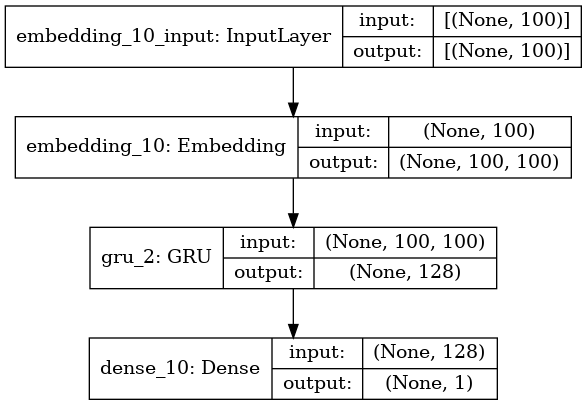

In [60]:
import tensorflow as tf
tf.keras.utils.plot_model(x33, show_shapes=True)


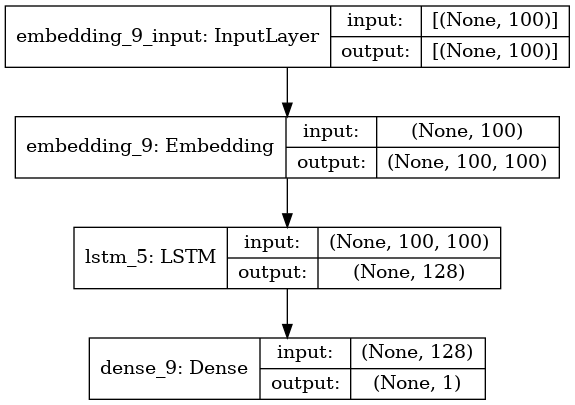

In [61]:
import tensorflow as tf
tf.keras.utils.plot_model(x22, show_shapes=True)

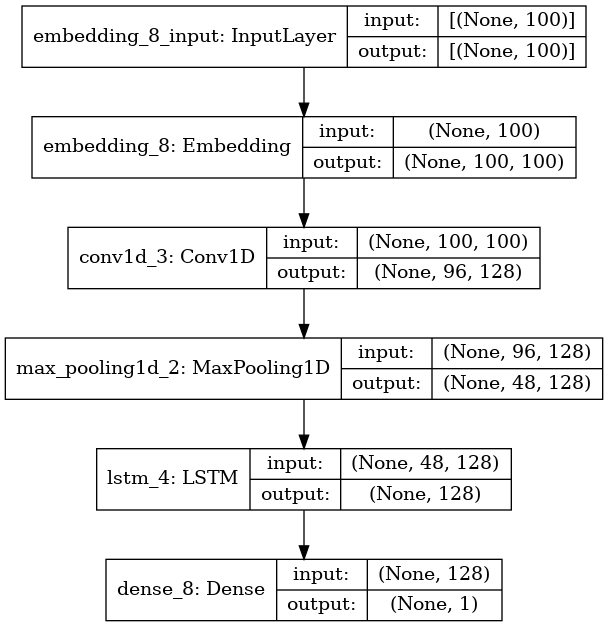

In [62]:
import tensorflow as tf
tf.keras.utils.plot_model(x11, show_shapes=True)

**TFIDF**

In [63]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,
test_size=0.20, random_state=42)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( use_idf=True, max_features=3000)
X_train_transformed = vectorizer.fit_transform(X_train1).toarray()
X_test_transformed = vectorizer.transform(X_test1).toarray()


In [65]:
X_train_transformed 

array([[0.        , 0.07323706, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [66]:
X_train_transformed1=X_train_transformed.reshape(X_train_transformed.shape[0],X_train_transformed.shape[1],1)
X_test_transformed1=X_test_transformed.reshape(X_test_transformed.shape[0],X_test_transformed.shape[1],1)

In [67]:
def model_RNNCNN_2(X_train,y_train):
    modelx = Sequential()
    #modelx.add((Embedding(vocab_size,l, weights=[embedding_matrix],input_length=maxlen)))
    modelx.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    modelx.add(MaxPooling1D(pool_size=2))
    modelx.add(LSTM(128))
    modelx.add(Dense(1, activation='sigmoid'))
    modelx.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=modelx.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
    return modelx,history

In [68]:
mod2,his=model_RNNCNN_2(X_train_transformed1,y_train1)

Epoch 1/6
250/250 [==============================] - 36s 136ms/step - loss: 0.6861 - accuracy: 0.5416 - val_loss: 0.6735 - val_accuracy: 0.5801
Epoch 2/6
250/250 [==============================] - 33s 130ms/step - loss: 0.6731 - accuracy: 0.5810 - val_loss: 0.6709 - val_accuracy: 0.5796
Epoch 3/6
250/250 [==============================] - 32s 128ms/step - loss: 0.6708 - accuracy: 0.5838 - val_loss: 0.6686 - val_accuracy: 0.5881
Epoch 4/6
250/250 [==============================] - 32s 127ms/step - loss: 0.6705 - accuracy: 0.5847 - val_loss: 0.6688 - val_accuracy: 0.5907
Epoch 5/6
250/250 [==============================] - 32s 127ms/step - loss: 0.6676 - accuracy: 0.5878 - val_loss: 0.6687 - val_accuracy: 0.5865
Epoch 6/6
250/250 [==============================] - 32s 127ms/step - loss: 0.6681 - accuracy: 0.5879 - val_loss: 0.6637 - val_accuracy: 0.5955


In [69]:
score = mod2.evaluate(X_test_transformed1, y_test1, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

313/313 [==============================] - 10s 31ms/step - loss: 0.6631 - accuracy: 0.5996
Test Score: 0.6631484627723694
Test Accuracy: 0.5996000170707703


In [70]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_transformed,y_train1)
print(clf.predict(X_test_transformed))
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test_transformed),y_test1)


[0 1 0 ... 1 0 0]


0.8509

In [71]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_transformed,y_train1)
print(clf.predict(X_test_transformed))
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test_transformed),y_test1)

[0 1 0 ... 1 0 1]


0.8921

In [72]:
 def simple_modelx(X_train,y_train):
    model=Sequential()
    #model.add(Embedding(vocab_size,3000,weights=[embedding_matrix],input_length=maxlen,trainable=False))
    #model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
   
    model.add(Dense(1,activation='sigmoid'))
    model.compile("adam",loss='binary_crossentropy',metrics=["acc"])
    history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
    return model,history


In [73]:
modx,his=simple_modelx(X_train_transformed,y_train)

Epoch 1/6
250/250 [==============================] - 2s 5ms/step - loss: 0.3380 - acc: 0.8646 - val_loss: 0.2758 - val_acc: 0.8839
Epoch 2/6
250/250 [==============================] - 1s 3ms/step - loss: 0.2461 - acc: 0.8989 - val_loss: 0.2850 - val_acc: 0.8754
Epoch 3/6
250/250 [==============================] - 1s 3ms/step - loss: 0.2287 - acc: 0.9061 - val_loss: 0.2864 - val_acc: 0.8777
Epoch 4/6
250/250 [==============================] - 1s 3ms/step - loss: 0.2104 - acc: 0.9144 - val_loss: 0.2962 - val_acc: 0.8770
Epoch 5/6
250/250 [==============================] - 1s 3ms/step - loss: 0.1833 - acc: 0.9265 - val_loss: 0.3068 - val_acc: 0.8741
Epoch 6/6
250/250 [==============================] - 1s 4ms/step - loss: 0.1471 - acc: 0.9464 - val_loss: 0.3194 - val_acc: 0.8730
